<center><b><font size="5"> MACHINE LEARNING PROJECT: 1 (UNSUPERVISED LEARNING)</font></b><center>

<center><b><font size="6", color="darkblue"> BANK MARKETING DATA SEGMENTATION</font></b><center>

<b>Name: Megha Garg<br>
Roll no. 045030</b>

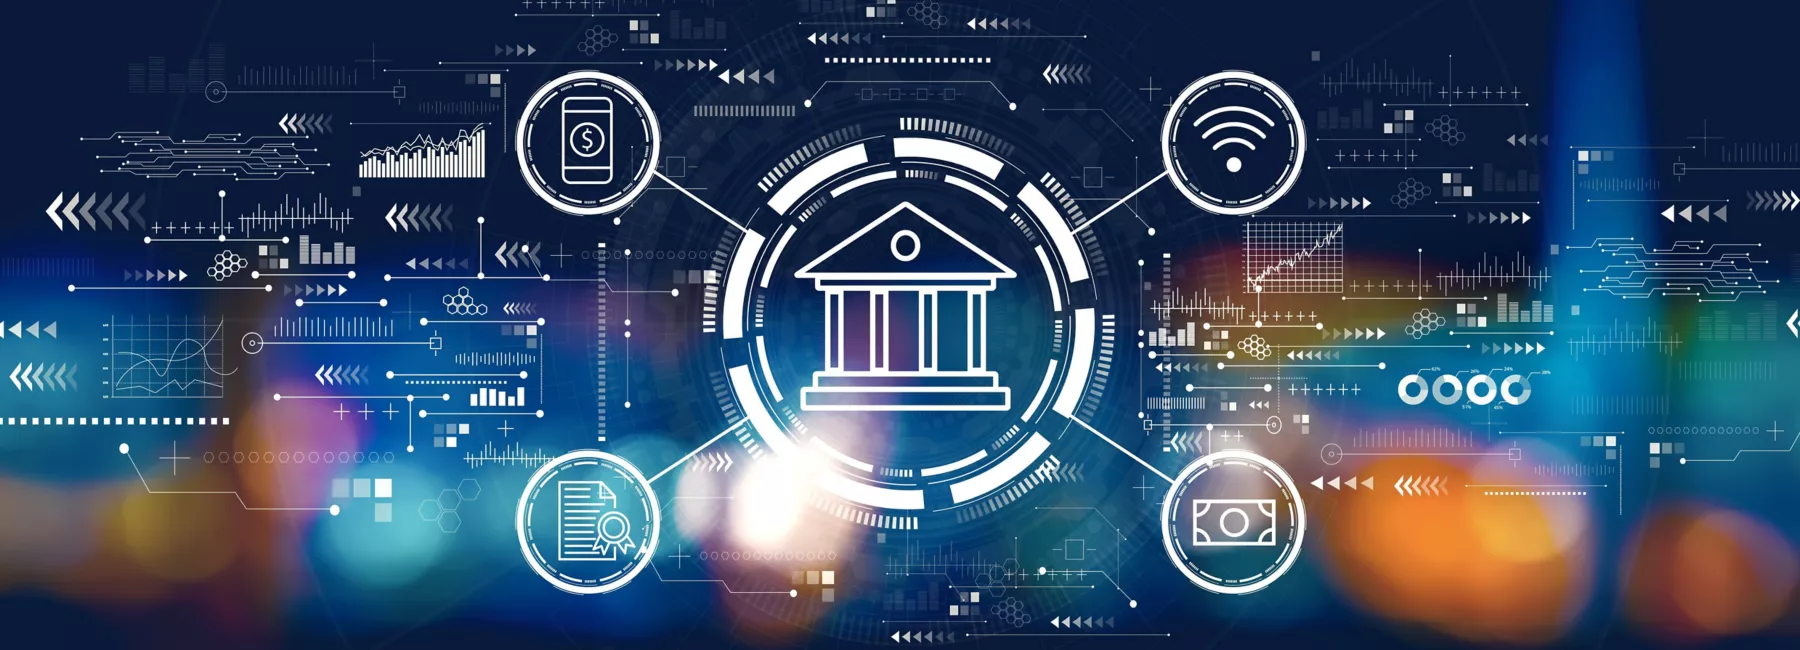

<h2><b><center>OBJECTIVE OF THE PROJECT</b></center></h2>

<B>The primary objective of this project is to segment bank customers based on their demographic attributes (age, job), banking behavior (duration, balance), and potentially identify distinct customer groups with similar characteristics. By comparing 2 clustering techniques, we aim to uncover underlying patterns and structures within the customer base, which can inform targeted marketing strategies and improve overall customer satisfaction and retention.</B>


<b>Reasons for Customer Segmentation:</b>

<b>1. Targeted Marketing Campaigns:</b>

Segmenting customers allows for the customization of marketing messages and offers based on their demographic profiles and banking behaviors. This can lead to more effective and personalized marketing campaigns, ultimately improving campaign outcomes and ROI.

<b>2. Product Development and Tailoring:</b>

Understanding the diverse needs and preferences of different customer segments can guide product development efforts. By identifying clusters with specific banking needs or preferences, banks can tailor their products and services to better meet the demands of each segment.

<b>3. Customer Retention and Loyalty:</b>

Segmenting customers enables banks to identify high-value segments and implement targeted retention strategies. By offering personalized incentives, rewards, and services to different customer segments, banks can enhance customer loyalty and reduce churn rates.

<b>4. Risk Management:</b>

Clustering customers based on their financial behaviors and attributes can help banks assess and manage risk more effectively. By identifying clusters with higher default or churn rates, banks can implement risk mitigation strategies and adjust lending or marketing practices accordingly.

<b>5. Resource Allocation:</b>

Segmenting customers allows banks to allocate resources more efficiently. By prioritizing high-value segments or segments with greater growth potential, banks can optimize resource allocation and maximize returns on investment in marketing, sales, and customer service initiatives.

<b>6. Market Understanding and Competitive Positioning:</b>

Analyzing customer segments provides insights into market trends, competitive dynamics, and opportunities for differentiation. By understanding the unique needs and preferences of different segments, banks can position themselves more effectively in the market and gain a competitive advantage.

In [1]:
pip install memory-profiler 


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Required Libraries
from pydataset import data # For Datasets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import warnings
#memory profiler for finding the memory of the clusters
warnings.filterwarnings("ignore") # Ignore the warnings

In [3]:
df = pd.read_csv("bank-full.csv") # importing the dataset
df_ah = df.copy()
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


<H2><center><b>DATA BRIEF</H2></b></center>
This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. 
This dataset comprises the results of a marketing campaign conducted by a financial institution, wherein a diverse range of bank customers were surveyed. The aim of this survey was to gather insights into the behaviors and preferences of existing customers. These insights are instrumental in analyzing and identifying avenues for enhancing future marketing campaigns, thereby facilitating the bank in refining its strategies to better serve its clientele.

- <b>Age:</b> Age of the individual (18-95year old).
- <b>Job: </b>Type of job (e.g., technician, management, blue-collar).
- <b>Marital: </b>Marital status of the individual (Single, Married, Divorced)
- <b>Education:</b> Level of education attained.
- <b>Default:</b> Whether the individual has credit in default (yes or no).
- <b>Balance:</b> Average yearly balance in euros.
- <b>Housing:</b> Housing status.
- <b>Loan: </b>Whether the individual has a personal loan (yes or no).
- <b>Contact:</b> Type of communication contact (cellular, telephone).
- <b>Day:</b> Last contact day of the week.
- <b>Month:</b> Last contact month of the year.
- <b>Duration: </b>Duration of last contact in seconds.
- <b>Campaign:</b> Number of contacts performed during this campaign for this client.
- <b>Pdays: </b>Number of days since the client was last contacted from a previous campaign.
- <b>Previous: </b>Number of contacts performed before this campaign for this client.
- <b>Poutcome:</b> Outcome of the previous marketing campaign (success, failure, non-existent).
- <b>y: </b>Indicator of whether the client subscribed to a term deposit (yes or no).

<b>1. Categorical Variables:</b>
 -   Ordinal Column - Education<br>
 - Nominal Columns - Job, Marital Status, Housing, Loan, Contact, Month, y
 
<b>2. Non-Categorical Variables:</b>
- Age, Balance, Duration, Campaign, Pdays, Previous

<H3><b>DATA VISUALISATION</b></H3>

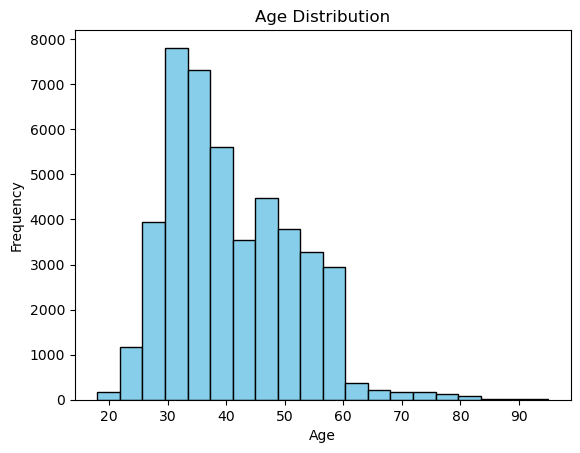

In [4]:
# Histogram of age distribution
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<b>OBSERVATION:</B><Br>
The concentration of customers between the ages of 30 to 40 may be attributed to this demographic's peak earning and spending years, as individuals in this age group typically have established careers, higher disposable incomes, and increased financial responsibilities such as mortgage payments and family expenses. Additionally, this age range often coincides with major life events such as marriage, homeownership, and parenthood, prompting individuals to engage more actively with banking services for savings, investments, and loan products.

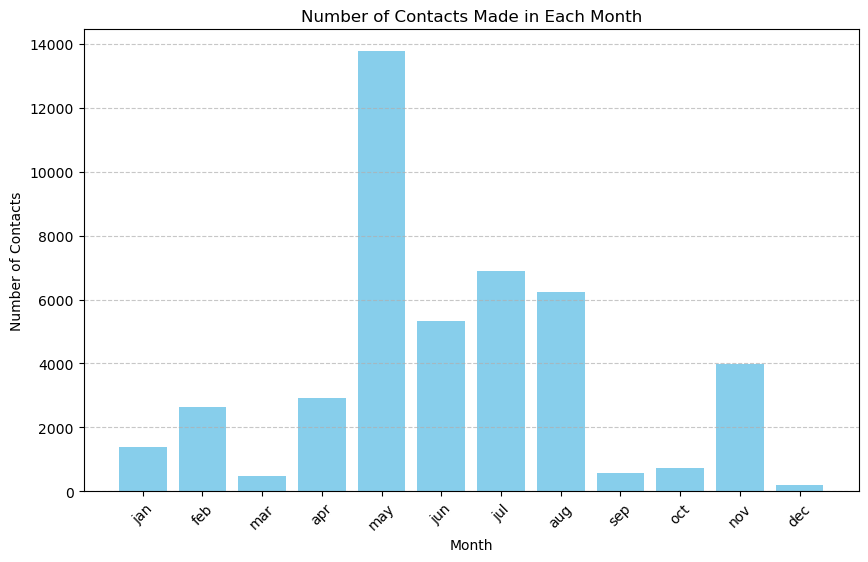

In [5]:
# Number of contacts made in each month.

# Define the desired order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_contacts = df['month'].value_counts().reindex(month_order)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_contacts.index, monthly_contacts.values, color='skyblue')
plt.title('Number of Contacts Made in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<b>OBSERVATION:</B><Br>
The higher number of contacts made by the bank during May, June, and July may coincide with seasonal trends such as tax season, summer vacations, and mid-year financial reviews, prompting increased financial activity and communication with customers. Conversely, the decrease in contacts during October, September, and December could be influenced by holidays, year-end financial planning, and reduced business operations during these periods.

<Figure size 1600x800 with 0 Axes>

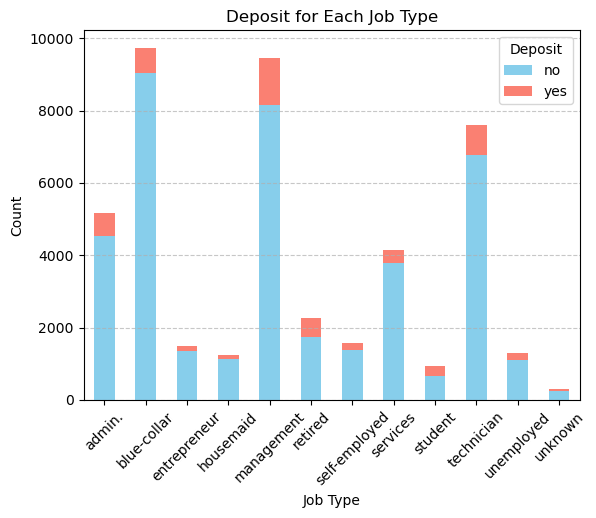

In [6]:
# Create a crosstab of job and deposit

import matplotlib.pyplot as plt

job_deposit_cross = pd.crosstab(df['job'], df['y'])

# Plot the stacked bar plot
plt.figure(figsize=(16, 8))
job_deposit_cross.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Deposit for Each Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<b>OBSERVATION:<b><br>

The stacked bar plot showcases the distribution of deposit subscriptions across various job types in the bank marketing dataset. It reveals that certain professions, such as admin, services, and retired individuals, exhibit a higher count of deposit subscriptions, while blue-collar, management, and technician roles show a higher proportion of non-subscriptions. This indicates a potential correlation between job type and deposit subscription behavior among bank customers.

<H2><center><b>DATA PRE-PROCESSING</H2></b></center>



<b><font size="4.5">1.1. Treatment of missing and duplicated values.</font></b>

In [7]:
# Checking Missing Values
variable_missing_data = df.isna().sum(); variable_missing_data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<B>Observation : As there are no missing values in the selected dataset, there is no use to Impute missing values</B><br>

In [8]:
# checking number of duplicated values.

num_duplicate_rows = df.duplicated().sum()

print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


<B>Observation: No Duplicate values present in the dataset.</B><br>

<b><font size="4.5">1.2. Data Bifurcation</font></b>

In [9]:
# Categorical Data
df_cat = df[['job', 'marital','education','default','housing','loan','contact','day','month','poutcome','y']]
# Non Categorical Data
df_noncat = df[['age', 'balance','duration','campaign','pdays','previous']]

<b>Categorical Data</b>

In [10]:
df_cat

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,5,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,5,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,5,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,17,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,17,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,17,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,17,nov,unknown,no


<b>Non-Categorical Data</b>

In [11]:
df_noncat

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825,977,3,-1,0
45207,71,1729,456,2,-1,0
45208,72,5715,1127,5,184,3
45209,57,668,508,4,-1,0


<b><font size="4.5">1.3. Numeric Encoding of Categorical Data [Nominal & Ordinal] </font></b>

<b>Need For Numeric Encoding:</b><br>
This allows clustering algorithms to process and analyze the data effectively, as most algorithms work with numerical inputs. Encoding ensures that categorical variables contribute meaningfully to the clustering process by representing them as numerical values while preserving the inherent characteristics of the original data.

In [12]:
from sklearn.preprocessing import OrdinalEncoder # Using OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']
noncategorical_columns = ['age', 'balance','duration','campaign','pdays','previous']
# Fit and transform the categorical columns
df_cat[categorical_columns] = ordinal_encoder.fit_transform(df_cat[categorical_columns])

print(df_cat)


        job  marital  education  default  housing  loan  contact  day  month  \
0       4.0      1.0        2.0      0.0      1.0   0.0      2.0    5    8.0   
1       9.0      2.0        1.0      0.0      1.0   0.0      2.0    5    8.0   
2       2.0      1.0        1.0      0.0      1.0   1.0      2.0    5    8.0   
3       1.0      1.0        3.0      0.0      1.0   0.0      2.0    5    8.0   
4      11.0      2.0        3.0      0.0      0.0   0.0      2.0    5    8.0   
...     ...      ...        ...      ...      ...   ...      ...  ...    ...   
45206   9.0      1.0        2.0      0.0      0.0   0.0      0.0   17    9.0   
45207   5.0      0.0        0.0      0.0      0.0   0.0      0.0   17    9.0   
45208   5.0      1.0        1.0      0.0      0.0   0.0      0.0   17    9.0   
45209   1.0      1.0        1.0      0.0      0.0   0.0      1.0   17    9.0   
45210   2.0      1.0        1.0      0.0      0.0   0.0      0.0   17    9.0   

       poutcome    y  
0           3.0 

All the categorical data is encoded into numerical form and ss there are no missing values, there is no use of creating dummy data.

<b> Encoded Values </b>

In [13]:
encoded_categories = ordinal_encoder.categories_

# To Print the categories along with their corresponding encoded values
for col_index, col_name in enumerate(categorical_columns):
    print(f"{col_name}:")
    category_strings = [f"{category}: {category_index}" for category_index, category in enumerate(encoded_categories[col_index])]
    print(", ".join(category_strings))


job:
admin.: 0, blue-collar: 1, entrepreneur: 2, housemaid: 3, management: 4, retired: 5, self-employed: 6, services: 7, student: 8, technician: 9, unemployed: 10, unknown: 11
marital:
divorced: 0, married: 1, single: 2
education:
primary: 0, secondary: 1, tertiary: 2, unknown: 3
default:
no: 0, yes: 1
housing:
no: 0, yes: 1
loan:
no: 0, yes: 1
contact:
cellular: 0, telephone: 1, unknown: 2
month:
apr: 0, aug: 1, dec: 2, feb: 3, jan: 4, jul: 5, jun: 6, mar: 7, may: 8, nov: 9, oct: 10, sep: 11
poutcome:
failure: 0, other: 1, success: 2, unknown: 3
y:
no: 0, yes: 1


<b><font size="4.5">1.4. Data Transformation & Rescaling [Treatment of Outliers] or Non-caregorical Data </font></b>

<b>Need For Data Transformation & Rescaling: </b><br>
To ensure that <b>numerical features have similar scales</b>, preventing bias in clustering algorithms. This enhances algorithm convergence, improves interpretability, and mitigates the influence of outliers, ultimately leading to more accurate and reliable clustering results.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_noncat[noncategorical_columns] = scaler.fit_transform(df_noncat[noncategorical_columns])
# Display the scaled DataFrame
print(df_noncat)

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016 -0.569351 -0.411453 -0.251940
1      0.288529 -0.437895 -0.416127 -0.569351 -0.411453 -0.251940
2     -0.747384 -0.446762 -0.707361 -0.569351 -0.411453 -0.251940
3      0.571051  0.047205 -0.645231 -0.569351 -0.411453 -0.251940
4     -0.747384 -0.447091 -0.233620 -0.569351 -0.411453 -0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747 -0.176460  2.791329  0.076230 -0.411453 -0.251940
45207  2.831227  0.120447  0.768224 -0.246560 -0.411453 -0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791 -0.228024  0.970146  0.399020 -0.411453 -0.251940
45210 -0.370689  0.528364  0.399328 -0.246560  1.476138  4.523577

[45211 rows x 6 columns]


<b><font size="4.5">1.5. Merging of both the dataset to give one final pre-processed data. </font></b>

In [15]:
df_ppd = df_cat.join(df_noncat); df_ppd # Pre-Processed Dataset

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y,age,balance,duration,campaign,pdays,previous
0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,5,8.0,3.0,0.0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940
1,9.0,2.0,1.0,0.0,1.0,0.0,2.0,5,8.0,3.0,0.0,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940
2,2.0,1.0,1.0,0.0,1.0,1.0,2.0,5,8.0,3.0,0.0,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940
3,1.0,1.0,3.0,0.0,1.0,0.0,2.0,5,8.0,3.0,0.0,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940
4,11.0,2.0,3.0,0.0,0.0,0.0,2.0,5,8.0,3.0,0.0,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9.0,1.0,2.0,0.0,0.0,0.0,0.0,17,9.0,3.0,1.0,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940
45207,5.0,0.0,0.0,0.0,0.0,0.0,0.0,17,9.0,3.0,1.0,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940
45208,5.0,1.0,1.0,0.0,0.0,0.0,0.0,17,9.0,2.0,1.0,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473
45209,1.0,1.0,1.0,0.0,0.0,0.0,1.0,17,9.0,3.0,0.0,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940


<b><font size="4.5">1.6. Feature Selection. </font></b>

<b>Need for feature selection:  </b><br>
Selecting a smaller set of features simplifies the modeling process and reduces the risk of overfitting. Focusing on a subset of features can improve model interpretability and generalization performance.

- <b>Age:</b> Age can provide insights into the life stage and financial needs of customers. Different age groups may exhibit distinct banking behaviors and preferences, making age a valuable feature for segmentation.

- <b>Job:</b> Job or occupation can reflect income level, lifestyle, and financial priorities. Clustering based on job types can help identify segments with common professional backgrounds and potentially similar banking requirements or preferences.

- <b>Duration: </b>The duration of the last contact during a marketing campaign can indicate the level of engagement or interest of customers. Clustering based on duration may reveal segments with varying responsiveness to marketing efforts, guiding targeted campaign strategies.

- <b>Balance:</b> Account balance is a direct indicator of financial stability and wealth. Clustering based on balance can help identify segments with different levels of financial resources and needs, allowing for tailored product offerings and services.


In [16]:
# Selecting the relevant features
column_for_clustering = ['age', 'job', 'duration','balance']
df_filtered = df_ppd[column_for_clustering]
df_filtered_ah = df_filtered.copy()  # To be used for agglomerative
df_filtered

,age,job,duration,balance
0,1.606965,4.0,0.011016,0.256419
1,0.288529,9.0,-0.416127,-0.437895
2,-0.747384,2.0,-0.707361,-0.446762
3,0.571051,1.0,-0.645231,0.047205
4,-0.747384,11.0,-0.233620,-0.447091
...,...,...,...,...
45206,0.947747,9.0,2.791329,-0.176460
45207,2.831227,5.0,0.768224,0.120447
45208,2.925401,5.0,3.373797,1.429593
45209,1.512791,1.0,0.970146,-0.228024


 <h1><b><center>2. CLUSTERING </h1></center></b>

<B><h3>Unsupervised machine learning algorithms:</b><br>
2.1 K-Means Clustering. <br>
2.2 BIRCH Hierarchical Clustering. </h3>


 <H2><b><center>K-MEANS CLUSTERING</H2></center></b>


<b>K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into k clusters.</b>
The algorithm aims to minimize the within-cluster sum of squares (WCSS) or inertia, which measures the compactness of clusters. It iteratively assigns data points to the nearest cluster centroid and updates centroids based on the mean of the data points in each cluster. The process continues until centroids converge or a maximum number of iterations is reached. The number of clusters k must be predetermined.

K-means is computationally efficient and relatively easy to understand and implement.

<b>The resulting clusters in K-means are easy to interpret and visualize, making it suitable for exploratory data analysis and insight generation.</b>


2.1.1 Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia.<br>
2.1.2 Create K-Means Clusters [K=2 | K=3 | K=4].<br>
2.1.3 Visualisation of Size Of Each Cluster<br>
2.1.4 Calculating Various Metrics(Centroid, Cluster Density and Separation).<br>
2.1.5  Compute Silhouette Score and Davies-Bouldin Index.<br>
2.1.6 K-Means Clustering Model Evaluation.<br>
2.1.7 Create a KMeans Cluster Member Dataframe.<br>
2.1.8 Plot the K-Means Clustered Data.<br>



<Br><B><font size="4.5">2.1.1. Determining Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia.</FONT></B><BR>
 
 - <B>Elbow method:</B> This method in K-means clustering involves plotting the number of clusters against KMeans-Inertia and selecting the point where the rate of decrease in WCSS significantly slows down (Elbow is created) as the optimal number of clusters.
 - <b>KMeans-Inertia:</b> Sum of Squared Distances of Samples to their closest Cluster Center (Centroid)

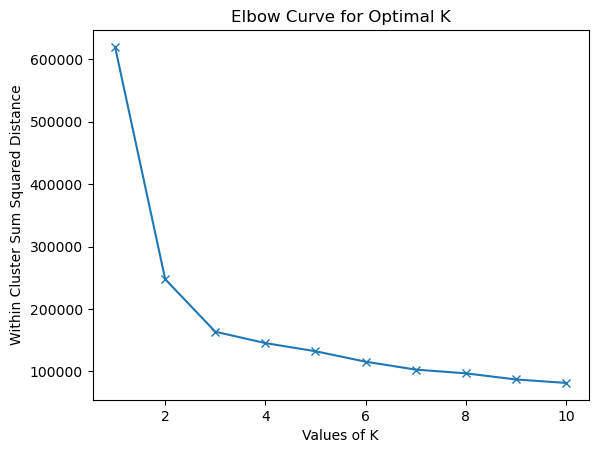

In [17]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(df_filtered)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

<b>OBSERVATION: </b><br>
The rate of decrease in WCSS significantly slows down i.e an elbow is created at K = 2, hence number of optimal clusters to be formed are 2.

<B><font size="4.5">2.1.2. Create K-Means Clusters.</FONT></B>
- Calculating Time Taken
- Calculating Memory Used
- Calculating Size

In [18]:
import time
import numpy as np
from memory_profiler import memory_usage


# For 2 Clusters

start_time = time.time()  # Starting the timer

km_2cluster = kmclus(n_clusters=2, init='random', random_state=222) # Initialising K-Means
km_2cluster_model = km_2cluster.fit_predict(df_filtered); km_2cluster_model # Fitting the model

end_time = time.time()  # Ending the timer

mem_usage = memory_usage((km_2cluster.fit_predict, (df_filtered,)))   # Calculating the memory used
max_mem_usage = max(mem_usage)

kmeans_2cluster_sizes = np.bincount(km_2cluster.labels_)   # Calculate Size of each cluster
print("Memory used by K-Means 2 cluster:", max_mem_usage, "KB")
print("Time taken by K-Means 2 cluster:", end_time - start_time, "seconds")

# ------------------------------------------------------------------------------------------------------------------

# 3 Clusters
start_time = time.time() # Starting the timer

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333) 
km_3cluster_model = km_3cluster.fit_predict(df_filtered); km_3cluster_model

end_time = time.time() # Ending the timer

mem_usage = memory_usage((km_3cluster.fit_predict, (df_filtered,)))  # Calculating the memory used
max_mem_usage = max(mem_usage)

kmeans_3cluster_sizes = np.bincount(km_3cluster.labels_)  # Calculate Size of each cluster
print("Memory used by K-Means 3 cluster:", max_mem_usage, "KB")
print("Time taken by K-Means 3 cluster:", end_time - start_time, "seconds")

# ------------------------------------------------------------------------------------------------------------------

# 4 Clusters


start_time = time.time()   # Starting the timer

km_4cluster = kmclus(n_clusters=4, init='random', random_state=444)
km_4cluster_model = km_4cluster.fit_predict(df_filtered); km_4cluster_model

end_time = time.time()  # Ending the timer

mem_usage = memory_usage((km_4cluster.fit_predict, (df_filtered,)))    # Calculating the memory used
max_mem_usage = max(mem_usage)

kmeans_4cluster_sizes = np.bincount(km_4cluster.labels_)   # Calculate Size of each cluster
print("Memory used by K-Means 4 cluster:", max_mem_usage, "KB")
print("Time taken by K-Means 4 cluster:", end_time - start_time, "seconds")

Memory used by K-Means 2 cluster: 250.65625 KB
Time taken by K-Means 2 cluster: 0.3614168167114258 seconds
Memory used by K-Means 3 cluster: 251.02734375 KB
Time taken by K-Means 3 cluster: 0.4616210460662842 seconds
Memory used by K-Means 4 cluster: 251.4140625 KB
Time taken by K-Means 4 cluster: 0.5237143039703369 seconds


<b>OBSERVATION: </b><br>

After multiple testing (as time and memory used is different every time models are created), the K-Means algorithm demonstrates the lowest computational demand for the given dataset, in terms of both time and memory usage, when applied to create two clusters compared to configurations with three or four clusters.

<BR><B><font size="4.5">2.1.3 Visualisation of Size Of Each Cluster</B></FONT>

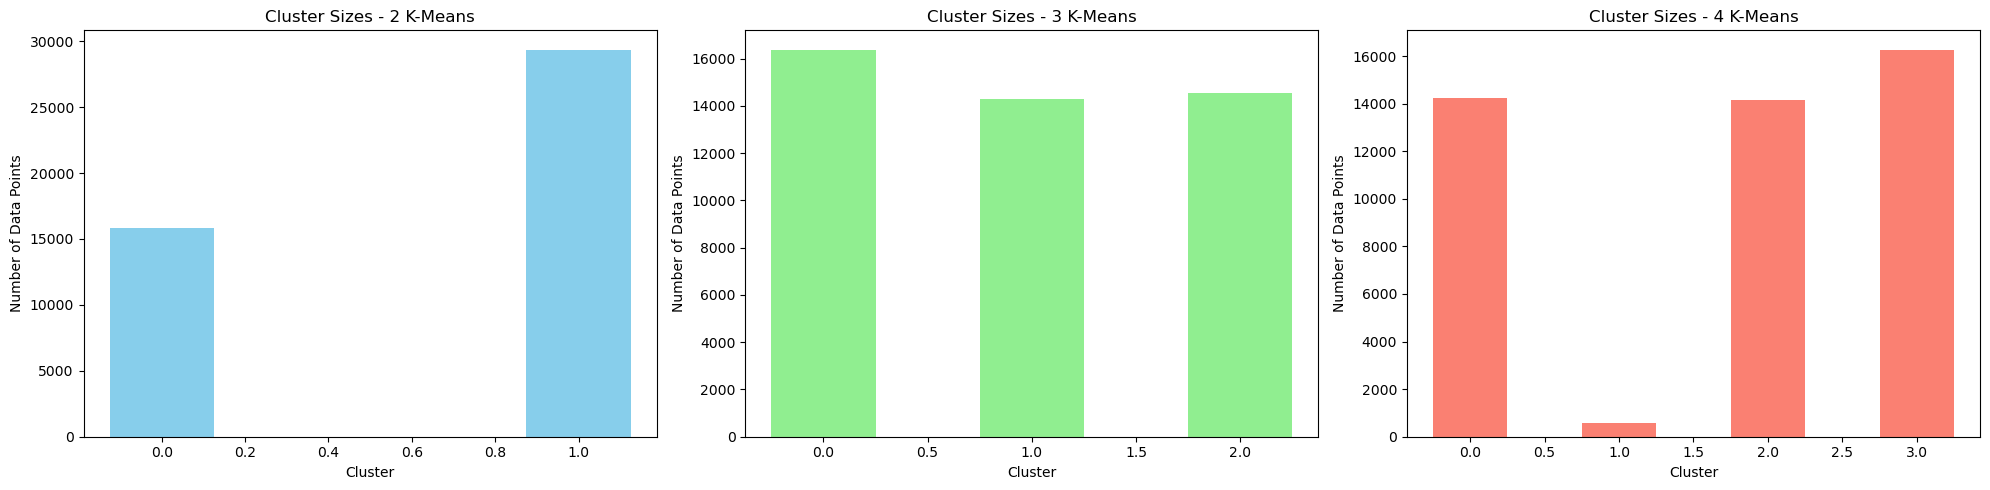

In [19]:
plt.figure(figsize=(20, 5))

# Plot for 2 clusters
plt.subplot(1, 3, 1)
plt.bar(range(len(kmeans_2cluster_sizes)), kmeans_2cluster_sizes, color='skyblue', width=0.25)
plt.title('Cluster Sizes - 2 K-Means')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')

# Plot for 3 clusters
plt.subplot(1, 3, 2)
plt.bar(range(len(kmeans_3cluster_sizes)), kmeans_3cluster_sizes, color='lightgreen', width=0.5)
plt.title('Cluster Sizes - 3 K-Means')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')

# Plot for 4 clusters
plt.subplot(1, 3, 3)
plt.bar(range(len(kmeans_4cluster_sizes)), kmeans_4cluster_sizes, color='salmon', width=0.5)
plt.title('Cluster Sizes - 4 K-Means')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()


<b>OBSERVATION: </b><br>

In the case of clustering with two clusters, the first cluster comprises approximately 15,900 data points, while the second cluster encompasses roughly 29,300 data points. Upon introducing a third cluster, the distribution shifts, with approximately 16,000 data points in the first cluster, 14,000 in the second, and 14,500 in the third. The introduction of a fourth cluster further diversifies the distribution, with approximately 14,000 data points in the first cluster, 800 in the second, 14,500 in the third, and 16,000 in the fourth.

<B><font size="4.5">2.1.4. Calculating Various Metrics</FONT></B>
- Centroid 
- Cluster Density 
- Cluster Separation

<b> Finding the Centroids of each cluster.</b> <br>
The centroids represent the mean values of the features within each cluster.

In [20]:
# Centroids 

centroids_2 = km_2cluster.cluster_centers_
centroids_3 = km_3cluster.cluster_centers_
centroids_4 = km_4cluster.cluster_centers_


print("Centroids for 2 clusters:")
print(centroids_2)
print("\nCentroids for 3 clusters:")
print(centroids_3)
print("\nCentroids for 4 clusters:")
print(centroids_4)


Centroids for 2 clusters:
[[-2.00149291e-01  8.23677407e+00  8.59118950e-04 -3.20732407e-02]
 [ 1.08141442e-01  2.23419188e+00 -4.64185317e-04  1.73292970e-02]]

Centroids for 3 clusters:
[[-8.90923945e-02  7.74331420e-01 -3.50209049e-03 -8.19154275e-02]
 [-2.17852082e-01  8.48431153e+00 -3.51146553e-03 -4.78029458e-02]
 [ 3.13957215e-01  4.28608726e+00  7.38536193e-03  1.39068453e-01]]

Centroids for 4 clusters:
[[-2.18504326e-01  8.48407285e+00 -3.89108031e-03 -7.58292944e-02]
 [ 4.16769661e-01  4.02260870e+00  2.41106494e-02  5.97405333e+00]
 [ 3.07553107e-01  4.28781453e+00  6.79730958e-03 -2.57928224e-02]
 [-9.12002148e-02  7.73098912e-01 -3.36244582e-03 -1.22443931e-01]]


<b>OBSERVATION: </b><br>

In the case of two clusters, the first centroid exhibits slightly negative values across all features, while the second centroid displays positive values. With three clusters, the centroids vary further highlighting even more diverse characteristics, showcasing distinct patterns across the features. Finally, with four clusters, indicating clear separation among the clusters based on the feature space.

<b>Calculating Cluster Density and Cluster Separation:</b><br>
The cluster density and separation metrics provide insights into the compactness and distinctiveness of the clusters formed by the algorithm.

In [21]:
from sklearn.metrics import pairwise_distances

# Function to calculate cluster density
def calculate_cluster_density(data, labels, centroids):
    cluster_densities = []
    for label, centroid in enumerate(centroids):
        cluster_points = data[labels == label]
        intra_distance = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        cluster_densities.append(intra_distance)
    return np.mean(cluster_densities)

# Function to calculate cluster separation
def calculate_cluster_separation(centroids):
    inter_cluster_distances = pairwise_distances(centroids, metric='euclidean')
    np.fill_diagonal(inter_cluster_distances, np.inf)  # Set diagonal elements to infinity
    return np.min(inter_cluster_distances)

# Calculate metrics for KMeans clusters with 2, 3, and 4 clusters
for n_clusters, kmeans_model in zip([2, 3, 4], [km_2cluster, km_3cluster, km_4cluster]):
    # Get centroids for clusters
    centroids = kmeans_model.cluster_centers_
    
    # Calculate cluster density
    cluster_density = calculate_cluster_density(df_filtered, kmeans_model.labels_, centroids)
    
    # Calculate cluster separation
    cluster_separation = calculate_cluster_separation(centroids)
    
    print(f"\nMetrics for {n_clusters} clusters:")
    print("Cluster Density:", cluster_density)
    print("Cluster Separation:", cluster_separation)



Metrics for 2 clusters:
Cluster Density: 2.033984020739859
Cluster Separation: 6.01069700861115

Metrics for 3 clusters:
Cluster Density: 1.610324077346851
Cluster Separation: 3.5417270427002796

Metrics for 4 clusters:
Cluster Density: 2.0528903049062976
Cluster Separation: 3.538597852182864


<b>OBSERVATION: </b><br>

For the configuration with two clusters, the cluster density is moderately high, indicating relatively dense clusters, while the <b>cluster separation is notably higher</b>, suggesting distinct separation between the clusters. With three clusters, the cluster density decreases slightly, indicating less compact clusters, yet the cluster separation remains high but less as compared to two clusters , indicating clear differentiation between the clusters. Similarly, for four clusters, the cluster density increases slightly, while the cluster separation remains equivalent to that for 3 clusters. Overall, these metrics suggest that the clustering algorithm effectively delineates distinct groups within the dataset, with varying degrees of compactness and separation indicating well-separated and relatively dense clusters for K = 2.

<BR><B><font size="4.5">2.1.5  Compute Silhouette Score and Davies-Bouldin Index.<br>
</font></B>

<b>Silhouette Score (s score):</b> It measures the compactness and separation of clusters by comparing the average distance between data points within the same cluster to the average distance between data points in different clusters. A higher silhouette score (ranging from -1 to 1) indicates better-defined clusters, with values closer to 1 suggesting dense, well-separated clusters.

<b>Davies-Bouldin Score (DB score):</b> It evaluates the clustering by considering both intra-cluster similarity and inter-cluster dissimilarity. A lower DB score indicates better clustering, with values closer to 0 suggesting dense, well-separated clusters.

In [22]:
# K-Means Clustering Model Evaluation

sscore_km_2cluster = sscore(df_filtered, km_2cluster_model); sscore_km_2cluster
dbscore_km_2cluster = dbscore(df_filtered, km_2cluster_model); dbscore_km_2cluster

sscore_km_3cluster = sscore(df_filtered, km_3cluster_model); sscore_km_3cluster
dbscore_km_3cluster = dbscore(df_filtered, km_3cluster_model); dbscore_km_3cluster

sscore_km_4cluster = sscore(df_filtered, km_4cluster_model); sscore_km_4cluster
dbscore_km_4cluster = dbscore(df_filtered, km_4cluster_model); dbscore_km_4cluster


print(f"Silhouette Score for 2 clusters: {sscore_km_2cluster}, Davies-Bouldin Score for 2 clusters: {dbscore_km_2cluster}")
print(f"Silhouette Score for 3 clusters: {sscore_km_3cluster}, Davies-Bouldin Score for 3 clusters: {dbscore_km_3cluster}")
print(f"Silhouette Score for 4 clusters: {sscore_km_4cluster}, Davies-Bouldin Score for 4 clusters: {dbscore_km_4cluster}")


Silhouette Score for 2 clusters: 0.5287550423721182, Davies-Bouldin Score for 2 clusters: 0.6767880722737807
Silhouette Score for 3 clusters: 0.465619218165841, Davies-Bouldin Score for 3 clusters: 0.864821959132759
Silhouette Score for 4 clusters: 0.47158878481340766, Davies-Bouldin Score for 4 clusters: 0.8373366629191177


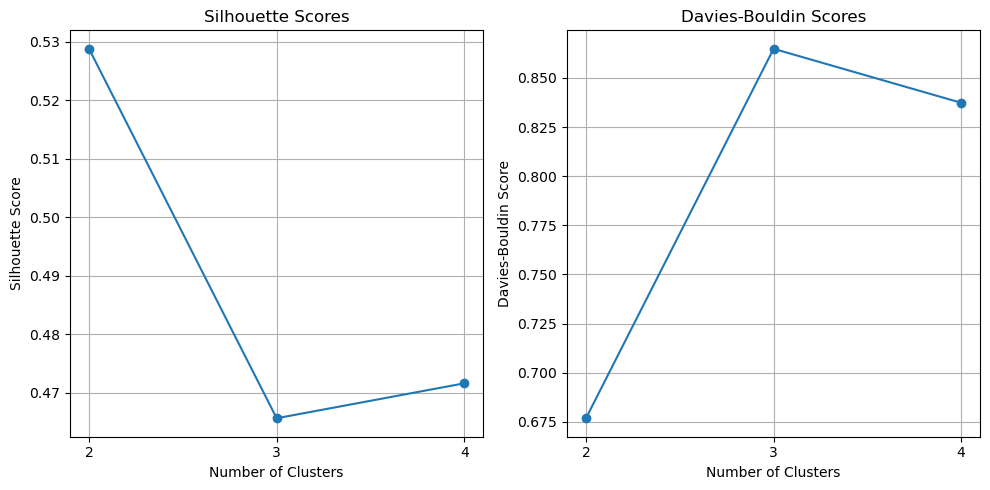

In [23]:
# Graph Plot Of S-Score and DB-Score
import matplotlib.pyplot as plt

# Define the number of clusters
num_clusters = [2, 3, 4]

# Define silhouette scores and Davies-Bouldin scores
silhouette_scores = [sscore_km_2cluster, sscore_km_3cluster, sscore_km_4cluster]
davies_bouldin_scores = [dbscore_km_2cluster, dbscore_km_3cluster, dbscore_km_4cluster]

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters)
plt.grid(True)

# Plot Davies-Bouldin scores
plt.subplot(1, 2, 2)
plt.plot(num_clusters, davies_bouldin_scores, marker='o', linestyle='-')
plt.title('Davies-Bouldin Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(num_clusters)
plt.grid(True)

plt.tight_layout()
plt.show()


<b>OBSERVATION:</b> <br>

Based on the silhouette and Davies-Bouldin scores, the K-means clustering with 2 clusters exhibits the highest silhouette score, indicating better cluster cohesion and separation compared to 3 and 4 clusters. However, the Davies-Bouldin score for 2 clusters is also the lowest, suggesting improved cluster compactness and distinctiveness. This implies that the dataset may be more naturally divided into two distinct groups, as evidenced by the optimal clustering performance for 2 clusters. 


 <b><font size="4.5">2.1.6 K-Means Clustering Model Evaluation:</font></b>
 

- The 2-cluster scenario demonstrated the highest silhouette score and the lowest Davies-Bouldin score compared to 3 and 4 clusters, indicating better cluster cohesion and separation.
- Optimal cluster density and separation metrics were observed for the 2-cluster configuration, suggesting more distinct and well-defined clusters.
- Computational efficiency was notably improved for the 2-cluster clustering algorithm, with the least amount of time taken and memory utilized.
- These findings underscore the effectiveness and efficiency of the 2-cluster clustering approach for the given dataset.

<b>Therefore, '2' clusters appears to be the most suitable choice based on these evaluation metrics.</b>

<BR><B><font size="4.5">2.1.7 Creating a K-Means Cluster Member Dataframe for 2 Clusters.</b></font>

Constructing a DataFrame that contains information about the membership of each data point in the clusters identified by the KMeans clustering algorithm. 

In [24]:
# Cluster Model Used : km_2cluster_model

bank_subset_kmcluster = df_filtered.copy()
bank_subset_kmcluster.reset_index(level=0, inplace=True, names='bank_index')
bank_subset_kmcluster['cluster_number'] = km_2cluster_model
bank_subset_kmcluster.sort_values('cluster_number', inplace=True); bank_subset_kmcluster

,bank_index,age,job,duration,balance,cluster_number
35994,35994,-0.464863,10.0,-0.412244,-0.194195,0
22039,22039,0.194355,9.0,0.321666,-0.090081,0
12022,12022,1.512791,11.0,-0.971413,-0.343634,0
37087,37087,-1.124080,6.0,-0.070529,-0.128836,0
12024,12024,-0.182341,7.0,-0.963647,-0.098620,0
...,...,...,...,...,...,...
17697,17697,-0.747384,1.0,0.760458,-0.447419,1
17699,17699,1.230269,1.0,0.306133,-0.367281,1
17701,17701,0.759399,4.0,-0.245270,-0.406036,1
17691,17691,-0.653211,0.0,-0.781140,-0.399139,1


In [25]:
df_ppd['cluster'] = bank_subset_kmcluster['cluster_number']
df_ppd

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y,age,balance,duration,campaign,pdays,previous,cluster
0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,5,8.0,3.0,0.0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,1
1,9.0,2.0,1.0,0.0,1.0,0.0,2.0,5,8.0,3.0,0.0,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,0
2,2.0,1.0,1.0,0.0,1.0,1.0,2.0,5,8.0,3.0,0.0,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,1
3,1.0,1.0,3.0,0.0,1.0,0.0,2.0,5,8.0,3.0,0.0,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,1
4,11.0,2.0,3.0,0.0,0.0,0.0,2.0,5,8.0,3.0,0.0,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9.0,1.0,2.0,0.0,0.0,0.0,0.0,17,9.0,3.0,1.0,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,0
45207,5.0,0.0,0.0,0.0,0.0,0.0,0.0,17,9.0,3.0,1.0,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,1
45208,5.0,1.0,1.0,0.0,0.0,0.0,0.0,17,9.0,2.0,1.0,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,1
45209,1.0,1.0,1.0,0.0,0.0,0.0,1.0,17,9.0,3.0,0.0,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,1


'cluster' represent the cluster to which a particular data point belongs.

<BR><B><font size="4.5">2.1.8 Plotting of K-Means Clustered Data for 2 Clusters.</b></font>

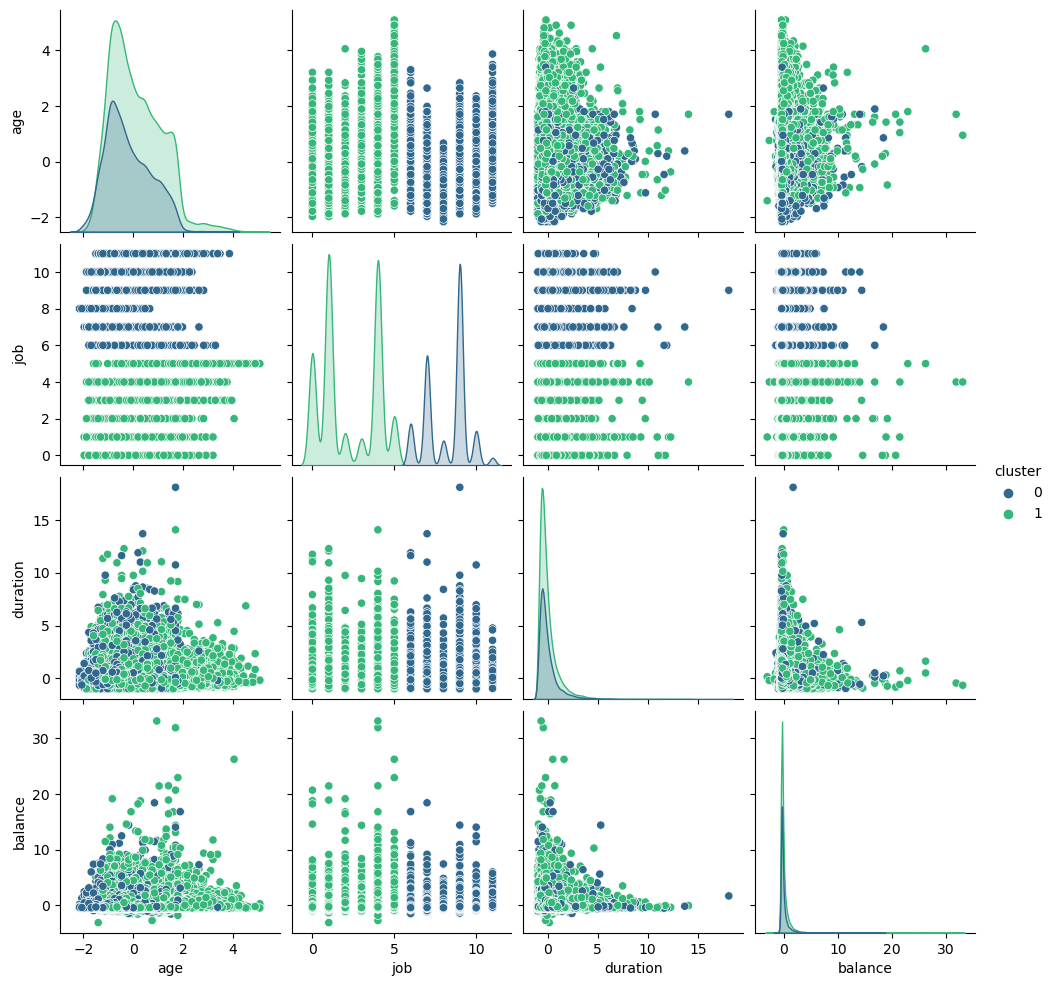

In [26]:
# Pairplot to visualize relationships between variables in different clusters
sns.pairplot(df_ppd, hue='cluster', vars=column_for_clustering, palette='viridis')
plt.show()

<b>OBSERVATION</b><br>
<h4><b>Cluster 1 (Green):</b></h4>

- Demographic Profile:
Predominantly consists of older individuals.
- Financial Behavior:
Moderate to high account balances.
Engages in longer call durations, indicating a higher level of engagement during marketing calls reflecting a higher level of interest or willingness to explore financial products or services. 
- Job Distribution:
Diverse job distribution including admin, blue-collar, housemaid, management, entrepreneur, and retired individuals.

<b><h4>Cluster 2 (Blue):</b></h4>

- Demographic Profile:
Primarily consists of younger professionals.
- Financial Behavior:
High account balances relative to age, indicating potential higher earning or savings capacity. They may prioritize savings and investment to build financial security or achieve future goals.
Engages in shorter call durations and has fewer previous days since last contact as Young professionals particularly those in demanding careers or pursuing higher education, may have limited time for lengthy phone conversations. 
- Job Distribution:
Predominantly composed of students, technicians, unemployed individuals, service workers, and self-employed individuals.

<b><center><font size="5"> BIRCH HIERARCHICAL CLUSTERING</font></center></b>

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering algorithm designed for clustering large datasets efficiently. 
<b>It constructs a tree structure called the CF-tree (Clustering Feature tree) to organize the data and perform clustering recursively.</b> 
An advantage of BIRCH is its ability to incrementally and dynamically cluster incoming, multi-dimensional metric data points to produce the best quality clustering for a given set of resources (memory and time constraints). In most cases, BIRCH only requires a single scan of the database.

2.2.1 Create BIRCH Models.<br>
2.2.2 Predict Cluster Labels for the Dataset.<br>
2.2.3 Assign cluster labels to the dataset. <br>
2.2.4 Visualisation of Size Of Each Cluster<br>
2.2.5 Calculating Various Metrics (Using Centroid, Cluster Density, Cluster Separation)<br>
2.2.6 Compute Silhouette Score and Davies-Bouldin Index.<br>
2.2.7 BIRCH Clustering Model Evaluation<br>
2.2.8 Plot the BIRCH Hierarchical Clustered Data.

In [27]:
df_filtered_ah # Pre-Processed Filtered data used.

,age,job,duration,balance
0,1.606965,4.0,0.011016,0.256419
1,0.288529,9.0,-0.416127,-0.437895
2,-0.747384,2.0,-0.707361,-0.446762
3,0.571051,1.0,-0.645231,0.047205
4,-0.747384,11.0,-0.233620,-0.447091
...,...,...,...,...
45206,0.947747,9.0,2.791329,-0.176460
45207,2.831227,5.0,0.768224,0.120447
45208,2.925401,5.0,3.373797,1.429593
45209,1.512791,1.0,0.970146,-0.228024


<BR><B><font size="4.5">2.2.1 Create BIRCH Models.</b></font>

These models are essentially representations of the cluster structure learned from the input data.
When we apply the BIRCH algorithm to a dataset, it constructs a hierarchical clustering structure known as the CF-tree (Clustering Feature tree). This tree organizes the data points in a balanced and efficient manner, enabling fast clustering and retrieval operations.

<BR><B><font size="4.5">2.2.2 Predict Cluster Labels for the Dataset.</b></font>

Predicting cluster labels for the dataset means assigning each data point in the dataset to a specific cluster based on the clustering model's learned structure. 

In [28]:
from sklearn.cluster import Birch


# For 2 Clusters

start_time = time.time() # Start Timer
birch_2clusters = Birch(n_clusters=2, threshold=0.4) # 2.2.1 Create Models
birch_2clusters.fit(df_filtered_ah)
birch_labels_2clusters = birch_2clusters.predict(df_filtered_ah) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_2clusters.fit, (df_filtered_ah,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 2 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 2 cluster:", end_time - start_time, "seconds")

#------------------------------------------------------------------------------------------------------------------

#For 3 Clusters 

start_time = time.time() # Start Timer
birch_3clusters = Birch(n_clusters=3, threshold=0.4) # 2.2.1 Create Models
birch_3clusters.fit(df_filtered_ah)
birch_labels_3clusters = birch_3clusters.predict(df_filtered_ah) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_3clusters.fit, (df_filtered_ah,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 3 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 3 cluster:", end_time - start_time, "seconds")

#------------------------------------------------------------------------------------------------------------------

# For 4 Clusters

start_time = time.time() # Start Timer
birch_4clusters = Birch(n_clusters=4, threshold=0.4)  # 2.2.1 Create Models
birch_4clusters.fit(df_filtered_ah)
birch_labels_4clusters = birch_4clusters.predict(df_filtered_ah) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_4clusters.fit, (df_filtered_ah,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 4 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 4 cluster:", end_time - start_time, "seconds")

Memory used by BIRCH 2 cluster: 1683.0234375 KB
Time taken by BIRCH 2 cluster: 6.204082250595093 seconds
Memory used by BIRCH 3 cluster: 1654.87109375 KB
Time taken by BIRCH 3 cluster: 5.99779748916626 seconds
Memory used by BIRCH 4 cluster: 1681.69140625 KB
Time taken by BIRCH 4 cluster: 6.251952886581421 seconds


<b> Observation: </b><br>

Upon multiple iterations and comparisons of memory usage and computation time across various cluster configurations (2 clusters, 3 clusters, and 4 clusters) utilizing the BIRCH algorithm, **negligible differences** were discerned. This observation suggests that the BIRCH algorithm maintains consistent computational efficiency across different cluster sizes. Despite variations in the number of clusters, the memory utilization and computation time remained relatively stable, indicating robust performance characteristics of the BIRCH algorithm.

<BR><B><font size="4.5">2.2.3 Assign cluster labels to the dataset. </b></font>

Assigning cluster labels to the dataset involves adding a new column to the dataset that indicates which cluster each data point belongs to. After clustering the data using a clustering algorithm like BIRCH, each data point is associated with a specific cluster based on its similarity to other data points in the same cluster.

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assign cluster labels to the dataset for 2 clusters
bank_subset_birch_2clusters = df_filtered_ah.copy()
bank_subset_birch_2clusters['cluster_number'] = birch_labels_2clusters

# Calculate the size of each cluster for 2 clusters
cluster_sizes_2 = np.bincount(birch_labels_2clusters)

# Assign cluster labels to the dataset for 3 clusters
bank_subset_birch_3clusters = df_filtered_ah.copy()
bank_subset_birch_3clusters['cluster_number'] = birch_labels_3clusters

# Calculate the size of each cluster for 3 clusters
cluster_sizes_3 = np.bincount(birch_labels_3clusters)

# Assign cluster labels to the dataset for 4 clusters
bank_subset_birch_4clusters = df_filtered_ah.copy()
bank_subset_birch_4clusters['cluster_number'] = birch_labels_4clusters

# Calculate the size of each cluster for 4 clusters
cluster_sizes_4 = np.bincount(birch_labels_4clusters)



<BR><B><font size="4.5">2.2.4 Visualisation of Size Of Each Cluster</B></FONT>

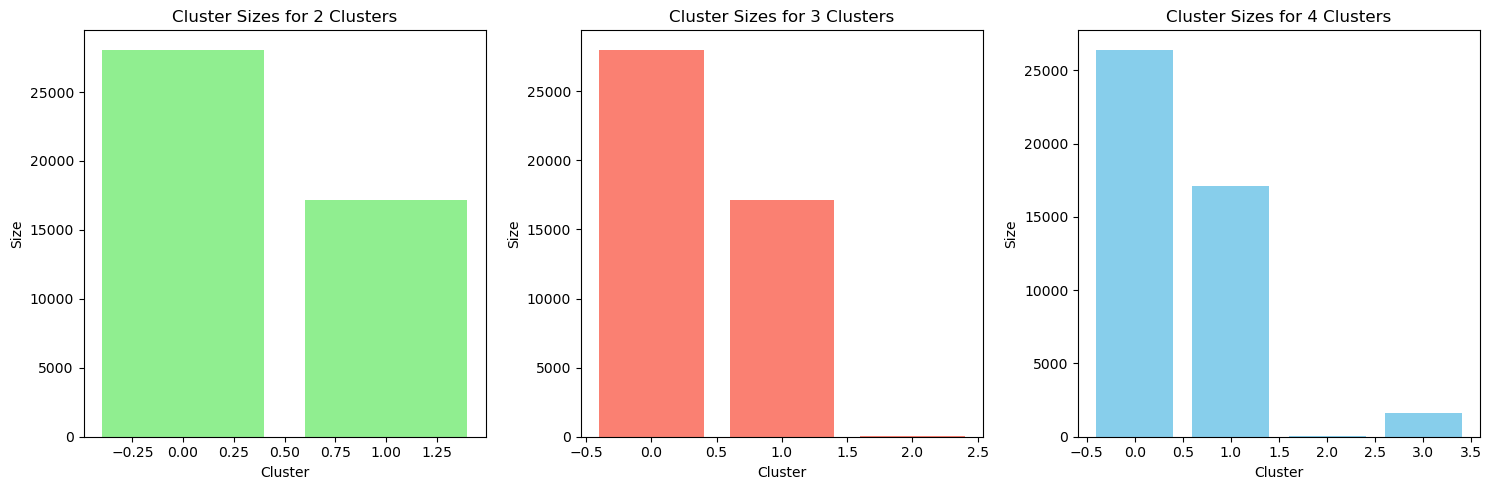

Cluster sizes for 2 clusters: [28071 17140]
Cluster sizes for 3 clusters: [28013 17140    58]
Cluster sizes for 4 clusters: [26414 17140    58  1599]


In [30]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 2 clusters
axes[0].bar(range(len(cluster_sizes_2)), cluster_sizes_2, color='lightgreen')
axes[0].set_title('Cluster Sizes for 2 Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Size')

# Plot for 3 clusters
axes[1].bar(range(len(cluster_sizes_3)), cluster_sizes_3, color='salmon')
axes[1].set_title('Cluster Sizes for 3 Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Size')

# Plot for 4 clusters
axes[2].bar(range(len(cluster_sizes_4)), cluster_sizes_4, color='skyblue')
axes[2].set_title('Cluster Sizes for 4 Clusters')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Size')

plt.tight_layout()
plt.show()

# Print cluster sizes
print("Cluster sizes for 2 clusters:", cluster_sizes_2)
print("Cluster sizes for 3 clusters:", cluster_sizes_3)
print("Cluster sizes for 4 clusters:", cluster_sizes_4)

<b> OBSERVATION:</b><br>


The cluster sizes for BIRCH clustering reveal varying degrees of data distribution across clusters. In the case of 2 clusters, there is a notable discrepancy in sizes, indicating potential unevenness in the data distribution. With 3 clusters, while two clusters maintain substantial sizes, the third cluster comprises fewer data points, suggesting a more nuanced partitioning. Moving to 4 clusters, the distribution becomes more balanced, with a more even spread of data points among clusters, potentially offering finer distinctions between data subsets.

<B><font size="4.5">2.2.5 Calculating Various Metrics</FONT></B>
- Centroid 
- Cluster Density 
- Cluster Separation

In [31]:
import numpy as np

# Function to calculate centroids of clusters
def calculate_cluster_centroids(data, labels):
    centroids = []
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)  # Calculate mean of cluster points
        centroids.append(centroid)
    return np.array(centroids)

# Calculate centroids for BIRCH clusters with 2 clusters
centroids_2clusters = calculate_cluster_centroids(df_filtered_ah, birch_labels_2clusters)

# Calculate centroids for BIRCH clusters with 3 clusters
centroids_3clusters = calculate_cluster_centroids(df_filtered_ah, birch_labels_3clusters)

# Calculate centroids for BIRCH clusters with 4 clusters
centroids_4clusters = calculate_cluster_centroids(df_filtered_ah, birch_labels_4clusters)

# Print centroids
print("Centroids for 2 clusters:")
print(centroids_2clusters)
print("\nCentroids for 3 clusters:")
print(centroids_3clusters)
print("\nCentroids for 4 clusters:")
print(centroids_4clusters)


Centroids for 2 clusters:
[[ 0.04057906  2.11022051  0.0153654   0.03746875]
 [-0.06645827  7.9911902  -0.02516465 -0.06136436]]

Centroids for 3 clusters:
[[ 3.82368714e-02  2.10587941e+00  1.51319570e-02  8.33512130e-03]
 [-6.64582743e-02  7.99119020e+00 -2.51646452e-02 -6.13643612e-02]
 [ 1.17181623e+00  4.20689655e+00  1.28112211e-01  1.41085069e+01]]

Centroids for 4 clusters:
[[ 4.03519251e-02  2.12860604e+00 -1.57746087e-01  1.54645845e-02]
 [-6.64582743e-02  7.99119020e+00 -2.51646452e-02 -6.13643612e-02]
 [ 1.17181623e+00  4.20689655e+00  1.28112211e-01  1.41085069e+01]
 [ 3.29814275e-03  1.73045654e+00  2.87091722e+00 -1.09437013e-01]]


<b> OBSERVATION: </b><br>


The centroids for BIRCH clustering depict the central representations of data points within each cluster. In the scenario with 2 clusters, there is noticeable divergence in feature values between the centroids, indicating distinct groupings within the data. Moving to 3 clusters introduces an additional centroid, suggesting further granularity in the clustering process, possibly capturing finer distinctions in the dataset. Expanding to 4 clusters refines the centroids further, illustrating more detailed delineations between data subsets with varying feature characteristics.

In [32]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

# Function to calculate cluster density for each cluster
def calculate_cluster_density(data, labels, centroids):
    cluster_densities = []
    for label, centroid in zip(np.unique(labels), centroids):
        cluster_points = data[labels == label]
        intra_distance = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        cluster_densities.append(intra_distance)
    return np.mean(cluster_densities)

# Function to calculate cluster separation for each cluster
def calculate_cluster_separation(centroids):
    inter_cluster_distances = pairwise_distances(centroids, metric='euclidean')
    np.fill_diagonal(inter_cluster_distances, np.inf)  # Set diagonal elements to infinity
    return np.min(inter_cluster_distances)

# Calculate metrics for BIRCH clusters with 2, 3, and 4 clusters
for n_clusters, birch_labels in zip([2, 3, 4], [birch_labels_2clusters, birch_labels_3clusters, birch_labels_4clusters]):
    # Calculate centroids for clusters
    centroids = calculate_cluster_centroids(df_filtered_ah, birch_labels)
    
    # Calculate cluster density for each cluster
    cluster_density = calculate_cluster_density(df_filtered_ah, birch_labels, centroids)
    
    # Calculate cluster separation for each cluster
    cluster_separation = calculate_cluster_separation(centroids)
    
    
    print(f"\nMetrics for {n_clusters} clusters:")
    print("Cluster Density:", cluster_density)
    print("Cluster Separation:", cluster_separation)




Metrics for 2 clusters:
Cluster Density: 2.082945282681307
Cluster Separation: 5.882913572970286

Metrics for 3 clusters:
Cluster Density: 3.1279878504478558
Cluster Separation: 5.886792500705051

Metrics for 4 clusters:
Cluster Density: 2.8469658316714264
Cluster Separation: 3.0574986292315263


<b>OBSERVATION:</b> <br>

For 2 clusters, the cluster density is approximately 2.08, suggesting a moderate concentration of data points within each cluster, while the separation metric of around 5.88 indicates a relatively clear distinction between clusters. Increasing the number of clusters to 3 results in a higher cluster density of about 3.13, indicating tighter groupings of data points within each cluster. However, the separation metric remains relatively unchanged at approximately 5.89, indicating consistent distinctiveness between clusters. Further partitioning into 4 clusters slightly reduces the cluster density to around 2.85, suggesting a more spread-out distribution of data points. Meanwhile, the separation metric decreases notably to about 3.06, indicating closer proximity between clusters and potentially overlapping boundaries.

<BR><B><font size="4.5">2.2.6 Compute Silhouette Score and Davies-Bouldin Index.</B></FONT>

In [39]:
# Compute Silhouette Score for 2 clusters
sscore_birch_2clusters = silhouette_score(df_filtered_ah, birch_labels_2clusters)
print(f"Silhouette Score for Birch clusters (2 clusters): {sscore_birch_2clusters}")

# Compute Davies-Bouldin Index for 2 clusters
dbscore_birch_2clusters = davies_bouldin_score(df_filtered_ah, birch_labels_2clusters)
print(f"Davies-Bouldin Index for Birch clusters (2 clusters): {dbscore_birch_2clusters}")


# Compute Silhouette Score for 3 clusters
sscore_birch_3clusters = silhouette_score(df_filtered_ah, birch_labels_3clusters)
print(f"Silhouette Score for Birch clusters (3 clusters): {sscore_birch_3clusters}")

# Compute Davies-Bouldin Index for 3 clusters
dbscore_birch_3clusters = davies_bouldin_score(df_filtered_ah, birch_labels_3clusters)
print(f"Davies-Bouldin Index for Birch clusters (3 clusters): {dbscore_birch_3clusters}")

# Compute Silhouette Score for 4 clusters
sscore_birch_4clusters = silhouette_score(df_filtered_ah, birch_labels_4clusters)
print(f"Silhouette Score for Birch clusters (4 clusters): {sscore_birch_4clusters}")

# Compute Davies-Bouldin Index for 4 clusters
dbscore_birch_4clusters = davies_bouldin_score(df_filtered_ah, birch_labels_4clusters)
print(f"Davies-Bouldin Index for Birch clusters (4 clusters): {dbscore_birch_4clusters}")


Silhouette Score for Birch clusters (2 clusters): 0.5140646815776152
Davies-Bouldin Index for Birch clusters (2 clusters): 0.7081339057067356
Silhouette Score for Birch clusters (3 clusters): 0.5161379273291821
Davies-Bouldin Index for Birch clusters (3 clusters): 0.6416339571784802
Silhouette Score for Birch clusters (4 clusters): 0.38659312476878116
Davies-Bouldin Index for Birch clusters (4 clusters): 0.9849034993505041


<b> OBSERVATION:</b><br>

The Silhouette Score and Davies-Bouldin Index for BIRCH clustering indicate varying cluster qualities across different cluster configurations. While 3 clusters exhibit relatively better separation and lower inter-cluster similarity, the cluster quality deteriorates with other clusters, as evidenced by lower Silhouette Scores and higher Davies-Bouldin Index values for 2 and 4 clusters. Therefore, 3 clusters appear to offer a more optimal clustering solution in terms of both cluster separation and compactness.

 <b><font size="4.5">2.2.7 BIRCH Clustering Model Evaluation</font></b>

- The 3-cluster scenario demonstrated the highest silhouette score and the lowest Davies-Bouldin score compared to 2 and 4 clusters, indicating better cluster cohesion and separation.
- Optimal cluster density and separation metrics were observed for the 3-cluster configuration, suggesting more distinct and well-defined clusters with similar values.
- Computational efficiency was notably improved for the 4-cluster clustering algorithm, with the least amount of time taken and memory utilized.
- These findings underscore the effectiveness and efficiency of the 3-cluster clustering approach for the given dataset.

<b>Therefore, '3' clusters appears to be the most suitable choice based on these evaluation metrics.</b>

<BR><B><font size="4.5">2.2.8 Plot the BIRCH Hierarchical Clustered Data.</B></FONT>

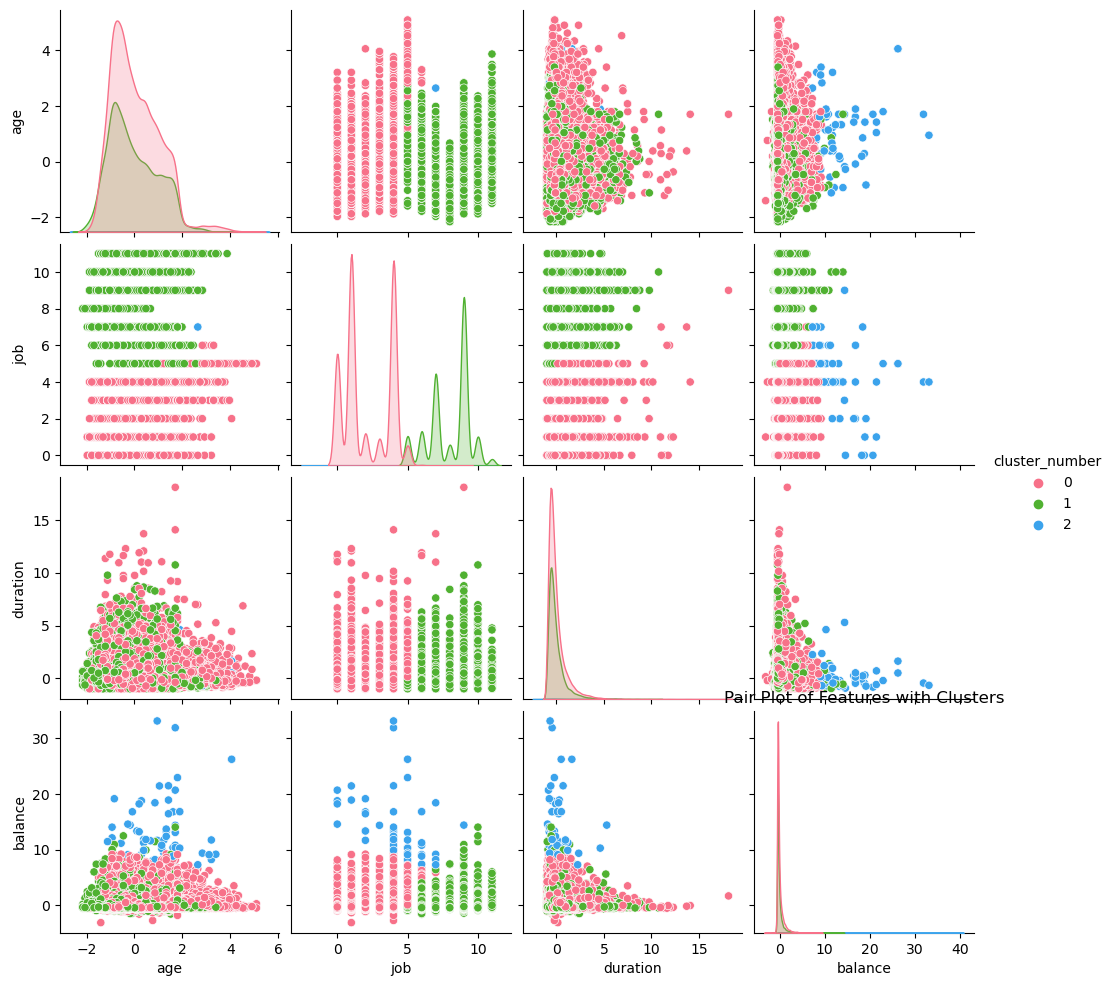

In [34]:
import seaborn as sns

# Assuming bank_subset_birch is your dataset with cluster labels assigned
custom_palette = sns.color_palette("husl", n_colors=3) 
# Define features to include in the pair plot
features = bank_subset_birch_3clusters.columns[:-1]  # Exclude the cluster_number column

# Plot pair plot for each cluster
sns.pairplot(data=bank_subset_birch_3clusters, hue='cluster_number', vars=features, palette=custom_palette)
plt.title('Pair Plot of Features with Clusters')
plt.show()


<B>OBSERVATION:</B><BR>
<h4><b>Cluster 1 (Pink):</b></h4>

- Demographic Profile:
Predominantly consists of older individuals.
- Financial Behavior:
Low to Moderate account balances.
Engages in longer call durations, indicating a higher level of engagement during marketing calls reflecting a higher level of interest or willingness to explore financial products or services. 
- Job Distribution:
Diverse job distribution including admin, blue-collar, housemaid, management, entrepreneur, and retired individuals.

<b><h4>Cluster 2 (Green):</h4></b>

- Demographic Profile:
Primarily consists of younger professionals.
- Financial Behavior:
Moderate account balances relative to age, indicating potential higher earning or savings capacity.
Engages in shorter call durations as compared to Cluster-1.
- Job Distribution:
Predominantly composed of students, technicians, unemployed individuals, service workers, and self-employed individuals.

<b><h4>Cluster 3 (Blue):</h4></b>

- Demographic Profile:
Mix of both younger as well older people.
- Financial Behavior:
Highest account balances relative to other Clusters, indicating higheest earning or savings capacity. They may prioritize savings and investment to build financial security or achieve future goals.
Engages in shorter call durations and has fewer previous days since last contact.
- Job Distribution:
Comprises a diverse representation of individuals across various professions, with notable concentrations observed in management, retired, and self-employed categories.


<H2><BR><B><center>COMPARISON BETWEEN K-MEANS AND BIRCH ClUSTERING</center></B></H2>



<b>In BIRCH Clustering we observed that number of optimal clusters were 3 whereas for K-Means number of optimal clusters were 2. For the final analysis we have to compare and choose the better model for clustering for our dataset, i.e., K-Means Clustering, where K=2.</b>

<h4><b>1. <u>On the Basis Of Size Of Cluster:</b></h4></u>

For K-Means the optimal number of clusters were 2 consisting of 15900 and 29300 datapoints.
Whereas BIRCH Clustering algorithm consisting of 3 clusters having 28013,17140 and 58 datapoints respectively.<br><br>

<h4><b>2. <u>On the basis of Memory Used and time taken:</h4></b></u>

K-means has a linear time complexity with respect to the number of data points and the number of features, while BIRCH has a time complexity that depends on the maximum number of entries in a leaf node and the logarithm of the number of data points. Generally time complexity of Kmeans algo is O(n^2) and BIRCH is O(n). 
The actual runtime performance of both algorithms can vary depending on factors such as the dataset size, dimensionality, and specific implementation details.

For the following dataset,<b> Time Taken by K-Means Clustering was approx. 0.068 seconds as compared to approx. 0.712 seconds for BIRCH.</b><br>
**(Approx because time taken is different every time models are created)**

Both K-means and BIRCH clustering algorithms generally have space complexities that scale linearly with the size of the input data. 
For K-means clustering, the space complexity primarily depends on the storage of the data points and centroids. 
For BIRCH clustering, the space complexity depends on the number of clusters and the number of data points, as well as the storage of the CF (Clustering Feature) tree structure.

For the folloeing dataset<b> memory used by the K-Means algorihtm was approx. 140 KB as compared to approx. 857 KB for BIRCH algorithm.</b><br> (Approx because memory used is different every time models are created)
<br><br>

<h4><b>3. <u>Composition Of Each Cluster:</h4></b></u>

-  <b>On the basis of centroids:<br></b>

    Centroids for K-Means 2 clusters:<br>
    [[-2.00149291e-01  8.23677407e+00  8.59118950e-04 -3.20732407e-02]<br>
    [ 1.08141442e-01  2.23419188e+00 -4.64185317e-04  1.73292970e-02]]<b>

    Centroids for BIRCH 3 clusters:<br>
    [[ 3.82368714e-02  2.10587941e+00  1.51319570e-02  8.33512130e-03]<br>
    [-6.64582743e-02  7.99119020e+00 -2.51646452e-02 -6.13643612e-02]<br>
    [ 1.17181623e+00  4.20689655e+00  1.28112211e-01  1.41085069e+01]]<br>
    
    The <b>centroids of K-Means clusters are more dispersed</b>, indicating a broader spread of data points within each cluster. This suggests that K-Means captures the variance in the data more effectively compared to BIRCH, where the centroids are relatively closer together.
    

-  <b>On the basis of Cluster Density:<br></b>
 
    Cluster Density For K-Means: 2.033984020739857<br>
    Cluster Density For BIRCH: 3.1279878504478558<br>

    <b>K-Means demonstrates a lower cluster density, implying that the data points within each cluster are spread out over a larger area.</b> In contrast, BIRCH exhibits higher cluster density, suggesting that data points are more densely packed within each cluster.<br>

-  <b>On the basis of Cluster Separation:<br></b>
    Cluster SeparationFor K-Means: 6.010697008611205<br>
    Cluster Separation For BIRCH: 5.886792500705051<br>   
    
   <b> K-Means achieves a higher cluster separation, indicating clearer boundaries between clusters.</b> This implies that K-Means is better at distinguishing between different groups of data points compared to BIRCH, which shows slightly less distinct separation between clusters.<br><br>
<h4><b>4. <u>On the basis of Silhouette Score and Davies-Bouldin Index:<br></b></h4></u>
<b>
Silhouette Score for K-Means: 0.5287550423721182<br>
Davies-Bouldin Score for K-Means 0.6767880722737807<br>
</b><br>
Silhouette Score for BIRCH: 0.5161379273291821<br>
Davies-Bouldin Index for BIRCH: 0.6416339571784802<br><BR>
<b>
While both algorithms yield comparable silhouette scores, K-Means outperforms BIRCH in terms of the Silhouette Score, indicating better cluster quality and separation for K-Means.</b>

Overall, based on these metrics, <u>**K-Means appears to be more suitable**</u> for this dataset as it offers better cluster separation, captures the variance in the data effectively, and demonstrates clearer boundaries between clusters compared to BIRCH.
<br>
<br>

<h2><b><center>SEGMENTATION INSIGHTS FOR THE BANK</H2></center></b>

Based on the evaluation of K-Means and BIRCH clustering algorithms, it is evident that K-Means outperformed BIRCH for our dataset. By employing K-Means clustering, the bank can efficiently categorize customers into distinct segments, enabling the provision of tailored solutions that meet the diverse needs of each group. This approach not only benefits the bank by optimizing its marketing strategies and resource allocation but also enhances customer satisfaction and engagement through personalized services.

<h3><b>CONCLUSION</b></h3>

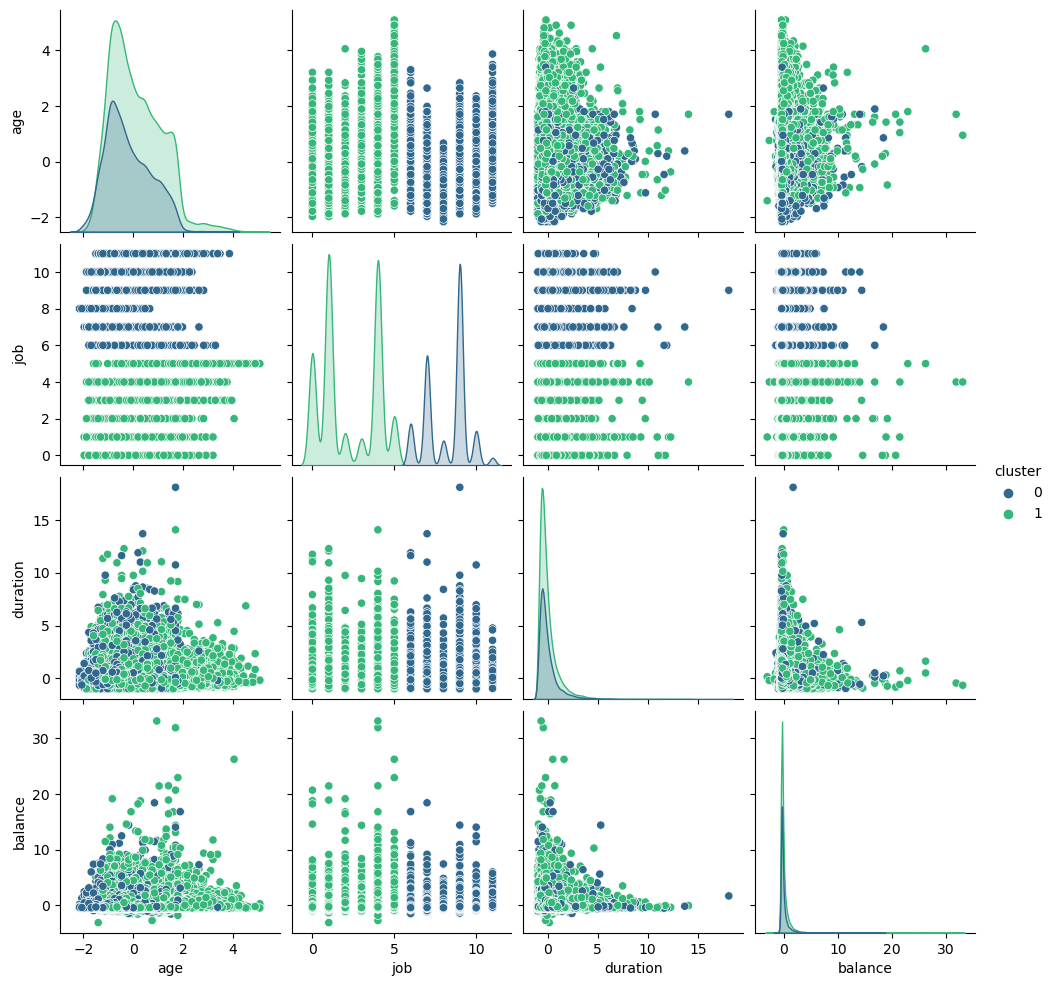

In [35]:
# Using K-Means Cluster For Analysis between various features.
sns.pairplot(df_ppd, hue='cluster', vars=column_for_clustering, palette='viridis')
plt.show()

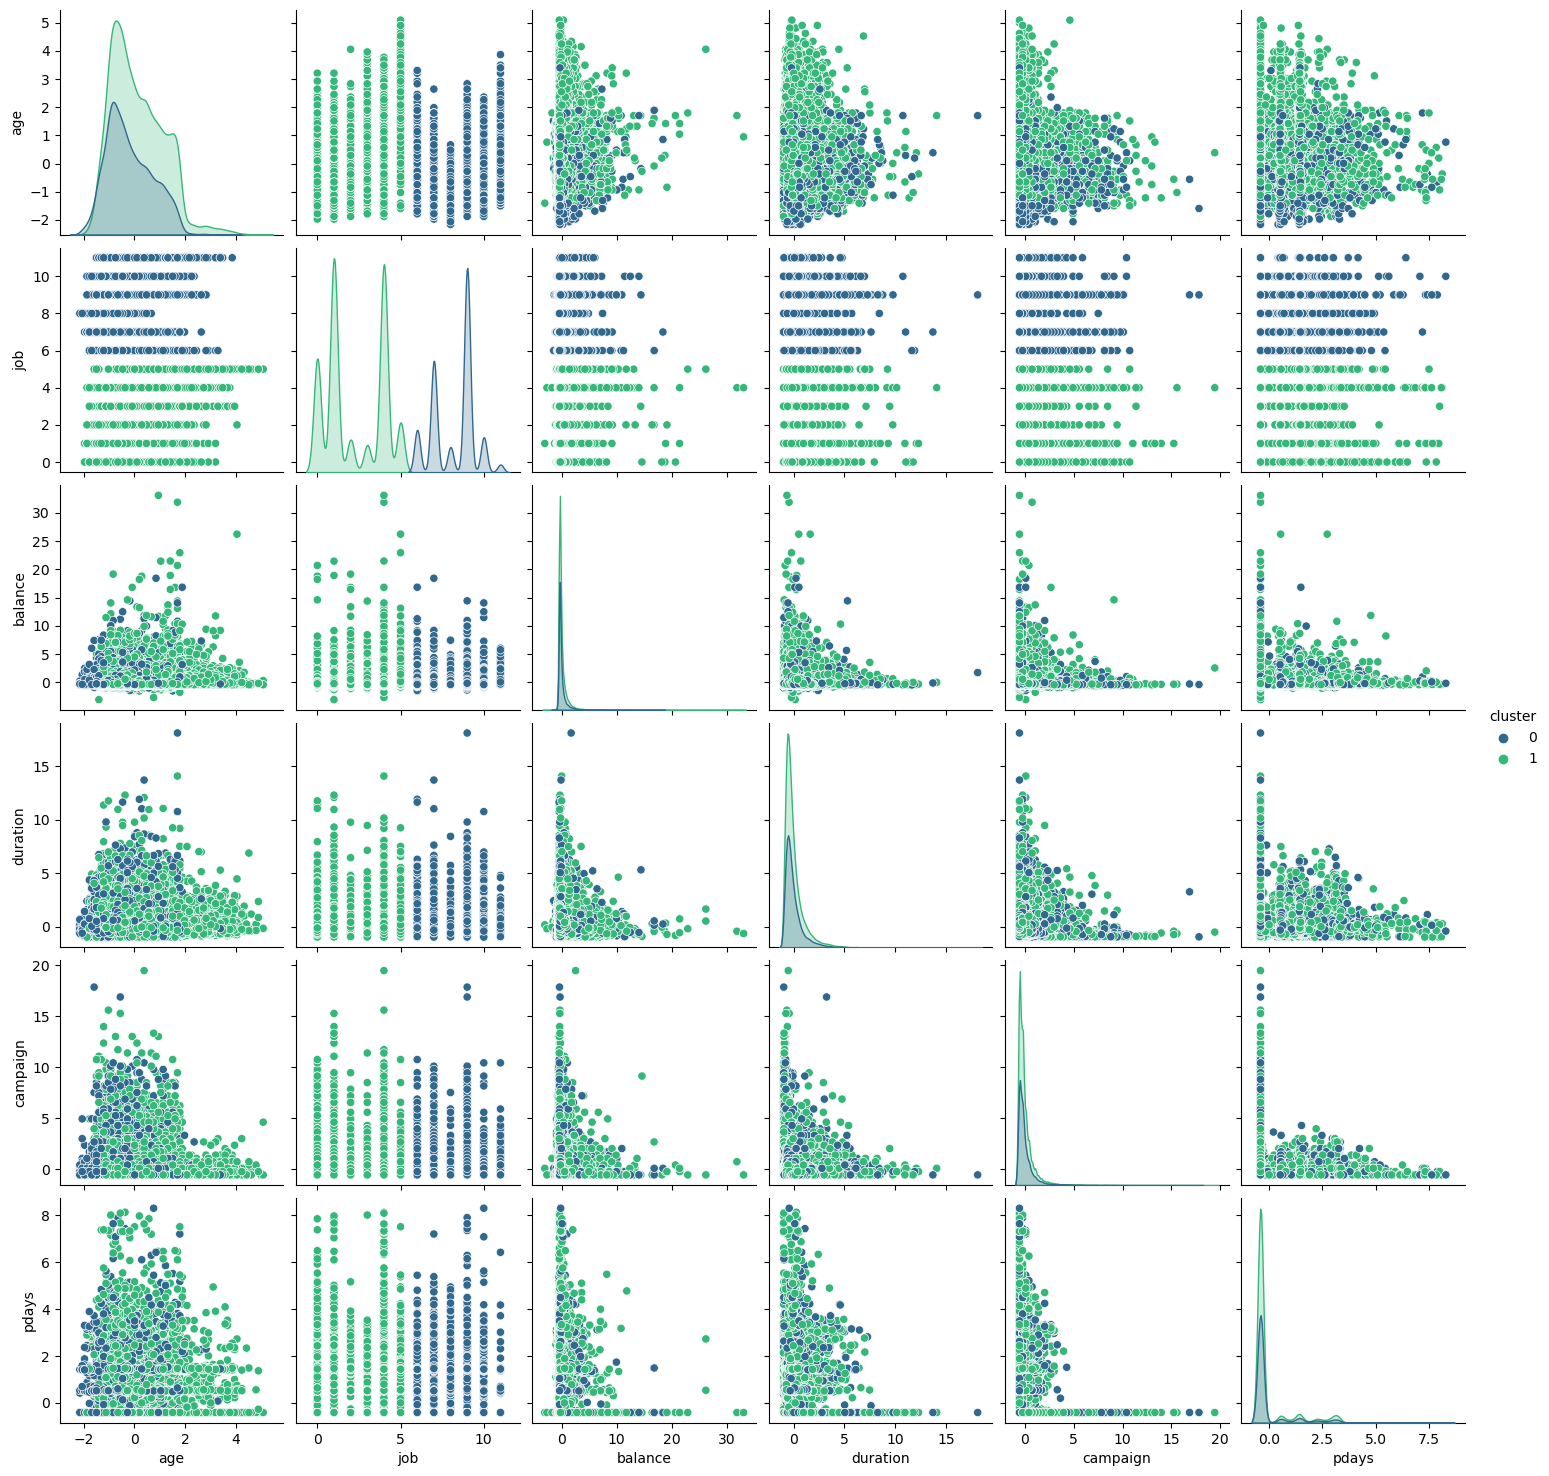

In [36]:
# Pairplot to visualize relationships between variables in different clusters
sns.pairplot(df_ppd, hue='cluster', vars=['age', 'job', 'balance','duration','campaign','pdays'], palette='viridis')
plt.show()

<h4><b>Cluster 1 (Green):</b></h4>

- <b>Demographic Profile:</b>
Predominantly consists of older individuals.
- <b>Financial Behavior:</b>
Moderate to high account balances.
Engages in longer call durations, indicating a higher level of engagement during marketing calls reflecting a higher level of interest or willingness to explore financial products or services. 
- <b>Job Distribution:</b>
Diverse job distribution including admin, blue-collar, housemaid, management, entrepreneur, and retired individuals.
- <b>High pdays:</b> Since individuals in this cluster have a higher average age and engage in longer call durations, it's plausible that they may have had previous interactions with the bank's marketing campaigns. 

<b><h4>Cluster 2 (Blue):</b></h4>

- <b>Demographic Profile:</b>
Primarily consists of younger professionals.
- <b>Financial Behavior:</b>
High account balances relative to age, indicating potential higher earning or savings capacity. They may prioritize savings and investment to build financial security or achieve future goals.
Engages in shorter call durations and has fewer previous days since last contact as Young professionals particularly those in demanding careers or pursuing higher education, may have limited time for lengthy phone conversations. 
- <b>Job Distribution:</b>
Predominantly composed of students, technicians, unemployed individuals, service workers, and self-employed individuals.
- <b>Less pdays:</b> Individuals in this cluster, who are primarily younger professionals, have fewer previous days since last contact (pdays). This suggests that they may have been contacted more recently or have a shorter history of interactions with the bank's marketing campaigns.

<h2><b><center>MARKETING STRATEGIES</center></b></h2>

<B>By segmenting the entire customer dataset into two distinct clusters, the bank can strategically tailor its services and offerings to meet the unique needs and preferences of each cluster. This segmentation enables the bank to implement targeted marketing strategies, personalized financial advice, and customized product recommendations, thereby enhancing customer satisfaction and loyalty. Additionally, the clustering allows the bank to streamline its operations and resource allocation, optimizing efficiency and cost-effectiveness. Furthermore, gaining insights into the specific characteristics and behaviors of each cluster empowers the bank to proactively address potential risks and capitalize on emerging opportunities in the market landscape.</B>

Some marketing strategies that can be followed by the bank.

<B><H4>FOR CLUSTER: 1 (Green):</b></H4>

<B>1. Personalized Retirement Planning Services: </B> As cluster 1 contains people with older age, the bank could offer one-on-one consultations with financial advisors who specialize in retirement planning. These advisors could help retirees within the cluster assess their retirement goals, evaluate their current financial situation, and develop personalized investment strategies to maximize their retirement income.

<B>2. Specialized Savings Accounts: </B> Introduce specialized savings accounts with competitive interest rates and flexible terms targeted at individuals with moderate balances. Emphasize features such as low fees, easy access to funds, and bonus incentives to encourage saving habits.

<B>3. Exclusive Loyalty Programs: </B> The bank could create a loyalty program specifically for middle-aged customers, offering rewards such as cashback bonuses on qualifying transactions, VIP customer service access, and invitations to exclusive banking events.

<B>4. Flexible Loan Products: </B> Introduce flexible loan products tailored to the needs of individuals with moderate balances, such as home renovation loans, education loans, or small business financing options. Offer competitive interest rates and repayment terms that accommodate their financial circumstances.

<B>5. Digital Banking Solutions: </B> Enhance digital banking solutions with user-friendly interfaces and features designed to meet the banking needs of much older clients. Provide convenient access to account management, financial planning tools, and customer support services.

<B>6. Relationship Manager Support: </B> Assign dedicated relationship managers to high-value customers within the cluster, offering personalized financial advice, proactive account management, and tailored product recommendations. Build long-term relationships based on trust, transparency, and exceptional service delivery.

<B><H4>For CLUSTER: 2 (Blue):</H4></B>

<B>1. Student Banking Packages: </B> Introduce student banking packages tailored to the needs of students and young adults within this cluster. Offer features such as no-fee accounts, budgeting tools, and discounts on student loans or credit cards to attract and retain student customers.

<B>2. Financial Literacy Campaigns: </B> The bank could partner with local schools and colleges to deliver financial literacy workshops and seminars to students and young adults. Topics could include budgeting, credit management, and saving for future goals.

<B>3. Social Media Engagement: </B> The bank could use social media platforms like Instagram to engage with younger customers within the cluster. For example, the bank could create educational content on personal finance topics, host live Q&A sessions with financial experts, and run social media contests or giveaways to attract followers.

<B>4. Microfinance Solutions: </B> Introduce microfinance solutions tailored to the needs of self-employed individuals and small business owners within the cluster. Offer microloans, business development support, and financial literacy training to facilitate entrepreneurship and economic empowerment.

<B>5. Career Transition Support:</B> Providing career transition support services for individuals facing unemployment or seeking new employment opportunities allows banks to foster stronger community ties, enhance customer loyalty, and mitigate credit risks by promoting financial stability among individuals. Additionally, these initiatives present opportunities for banks to identify new business prospects and bolster their reputation as socially responsible entities, ultimately contributing to long-term growth and profitability.

<h2><b><center>MANAGERIAL IMPLICATIONS</center></b></h2>

<b>1. Enhanced Targeting:</b> Use cluster analysis to identify high-value customer segments and target marketing efforts more effectively. Tailor product offerings, promotions, and messaging to the specific needs and preferences of each cluster, increasing relevance and engagement.

<b>2. Improved Conversion Rates:</b> By understanding the characteristics and behaviors of different customer segments, banks can optimize marketing campaigns to resonate with target audiences, resulting in higher conversion rates and improved ROI on marketing investments.

<b>3. Reduced Marketing Costs:</b> By focusing marketing efforts on the most promising customer segments identified through clustering, banks can reduce wasteful spending on broad, indiscriminate marketing campaigns. Targeted messaging and precise targeting can lead to more efficient use of resources and higher returns.

<b>4. Enhanced Customer Experience: </b>Personalized marketing based on cluster insights can enhance the overall customer experience by delivering relevant and timely communications. Customers are more likely to engage with marketing messages that address their specific needs and interests, leading to increased satisfaction and loyalty.

<b>5. Data-Driven Decision Making:</b> Cluster analysis provides banks with actionable insights into customer segmentation and preferences, enabling data-driven decision making across marketing activities. By leveraging these insights, banks can make informed strategic decisions to drive business growth and competitive advantage in the market.

<b>6. Risk Management:</b> Managers can use cluster analysis to identify and mitigate risks associated with different customer segments, such as credit risk, fraud risk, or regulatory compliance risk. By proactively addressing potential risks within each cluster, managers can protect the bank's reputation and financial stability.


<h3><b><center>REFERENCES</h3></b></center>

1. Dataset: Kaggle (https://www.kaggle.com/datasets/hariharanpavan/bank-marketing-dataset-analysis-classification)
2. Code Reference: medium.com, geekforgeeks, notes
3. Google: analytixlabs.co.in
4. Other References: chatgpt